# 超級on 9 六合彩分析. 千祈唔好信

小賭養妻活兒, 大賭創業興家

d code 可能會錯. 我唔包正確, 更加唔包發達

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import seaborn as sns

%matplotlib inline

In [216]:
#load training data
lottery_result = pandas.read_csv('mark_six.csv', sep=',', index_col=(0, 1))

In [15]:
display(lottery_result.ix[2003:2017])

N1  N2  N3  N4  N5  N6  S1 Remarks
YEAR TIMES                                    
2003 1      23  27  26   5  16   6  46     NaN
     2      10  43  12  38   9  26  15     NaN
     3       8  23  22  49  21  17  24     NaN
     4      32  28  33  11  13   7  20     NaN
     5       2  40  39  42  34  36  29     NaN
     6      44  49  16  20  21  43   6     NaN
     7      36   6  38  27  14  23  49     NaN
     8      30  10  25  46   5  41  48     NaN
     9       7  28   8   4   5   6  23     NaN
     10     28  43  12   7  20  27  46     NaN
     11     18  31  26  11  46   4  16     NaN
     12     22  11  28  38  40  23  29     NaN
     13     12   8  24  39   4  40  18     NaN
     14     20  49  19  10  16  40  24     NaN
     15     41  48  13  24  16   1  35     NaN
     16     42  19  13  45  28  23  15     NaN
     17     25   4  21  12   9  34  36     NaN
     18     38   9  44  42  32  33  43     NaN
     19     48  15  40  20  35  45  30     NaN
     20     10  35  39  31  22  20  17     NaN
     21     49  21   3  20  43   2  32     NaN
     22     22  23  35   8  24  10  33     NaN
     23     13  14  39  23  21  42  36     NaN
     24     30  28  23  34  13  42  20     NaN
     25     48  22  21   9  26  37  35     NaN
     26     48  12  43  30  40  17  18     NaN
     27     32  29  21  43  38  41   7     NaN
     28     13   6  47  11  40  24  42     NaN
     29      7  11  33  23  13  31  28     NaN
     30     37  39  15  28  27   9  33     NaN
...         ..  ..  ..  ..  ..  ..  ..     ...
2017 56      7   5  15  10   1   9   3     NaN
     57     20  28  11   7  49  41  32     NaN
     58     17   3   2  48  34  38  14     NaN
     59     46  29   7  13  17  23  49     NaN
     60     40  48  39  27  23  26   7     NaN
     61      5  18  43  22   7  33  27     NaN
     62     37  38  27  32  14  18   1     NaN
     63     23  28  45  18  36   4  33     NaN
     64     33  24  15  25  40  11  42     NaN
     65     30  47  49  26  24   8  35     NaN
     66     11  23   8  29  15  24   6     NaN
     67     23   1  18  13  30  44  42     NaN
     68     34  21  49  46  27  23  44     NaN
     69     19   2   5   1  12  18  44     NaN
     70      9  34  42  39  49  46  32     NaN
     71     15  20  45  35  25  18  34     NaN
     72     31  49  20  21  18  27  45     NaN
     73     30   3  28  42  32  37  11     NaN
     74     12  24  48  40  30  44   8     NaN
     75     29  11  37  16  27  26  19     NaN
     76      9  39   4  33  27  42  35     NaN
     77     15   5  38  27  26   2  18     NaN
     78     30   7   2   8  10   6  28     NaN
     79     21   8  36  11   3  48  37     NaN
     80     43  22  45   1  20  11  35     NaN
     81     29   4  41  27  25   5  18     NaN
     82     29  43  48  35  42  34  26     NaN
     83     14   6  32  40  46  33  10     NaN
     84     12  25   9  34   5  26  21     NaN
     85     36   4   6  27  47  49   3     NaN

[2171 rows x 8 columns]

# Simple strategy: expiloting distribution

The lottery machine is not perfect, it may bias some number more than other. One strategy is to generate random number according to the historical distribution

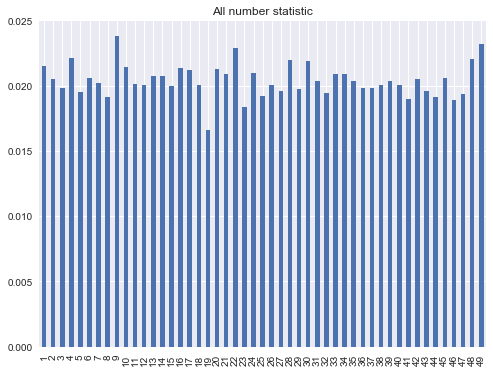

In [128]:
def combine_6_to_1(sample):
    return sample['N1'].append(sample['N2']).append(sample['N3']).append(sample['N4']).append(sample['N5']).append(sample['N6']).reset_index(drop=True)

sample = lottery_result.ix[2003:2017].reset_index(drop=True)
small_sample = lottery_result.ix[2017].reset_index(drop=True)

all_num = combine_6_to_1(sample)
fig = plt.figure(figsize=(8,6))
all_num_cnt = all_num.value_counts().sort_index()
all_num_cnt_norm = all_num_cnt / all_num_cnt.sum()
all_num_cnt_norm.plot.bar()
plt.title('All number statistic')

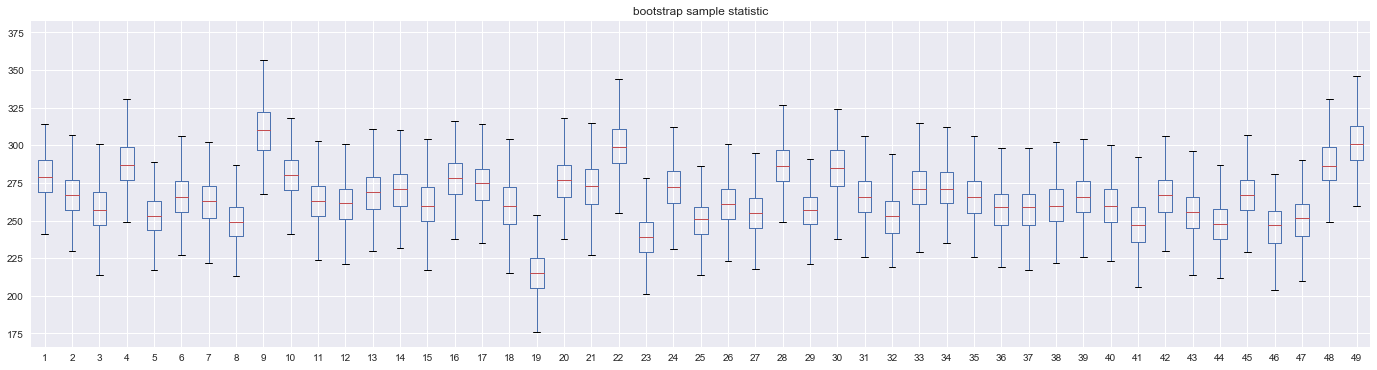

In [74]:
#use bootstrap to find out the a better descriptive statistics
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X.loc[resample_i]
    return X_resample

def num_array_to_hist(values):
    return values.value_counts()

all_df = pandas.DataFrame(data=np.zeros((49, 500)), index=range(1,50))

for i in range(500):
    bootstrap_sample = bootstrap_resample(sample)
    all_num = combine_6_to_1(bootstrap_sample)
    hist_num = num_array_to_hist(all_num)
    all_df[i] = hist_num


fig = plt.figure(figsize=(24,6))
all_df.T.boxplot()
plt.title('bootstrap sample statistic')


In [72]:
all_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
1,284,273,307,273,312,289,270,272,276,284,...,275,274,292,288,289,286,280,280,266,313
2,275,261,250,265,264,264,254,276,260,276,...,274,238,260,263,269,279,282,266,262,269
3,243,250,274,223,255,265,236,243,269,281,...,274,261,264,258,263,259,256,251,283,248
4,307,311,298,289,283,280,275,327,306,261,...,320,295,289,312,280,284,301,307,296,290
5,248,244,255,243,279,254,268,260,245,260,...,252,254,249,274,268,263,274,256,244,253
6,283,275,277,254,265,252,272,288,273,262,...,282,259,253,267,266,264,224,259,246,264
7,237,251,237,276,268,253,258,238,272,245,...,270,260,240,271,277,233,269,263,269,261
8,245,248,268,264,248,247,266,241,289,263,...,241,255,252,247,249,267,253,238,266,246
9,282,312,300,314,306,305,304,309,277,337,...,300,294,314,286,294,323,342,288,305,308
10,299,275,287,274,281,282,279,274,304,292,...,278,289,275,308,291,270,284,276,280,281


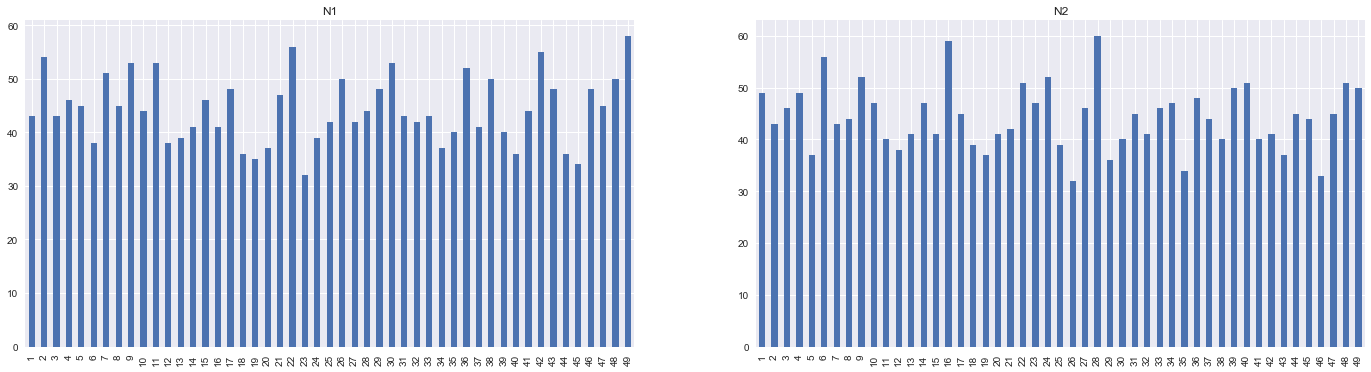

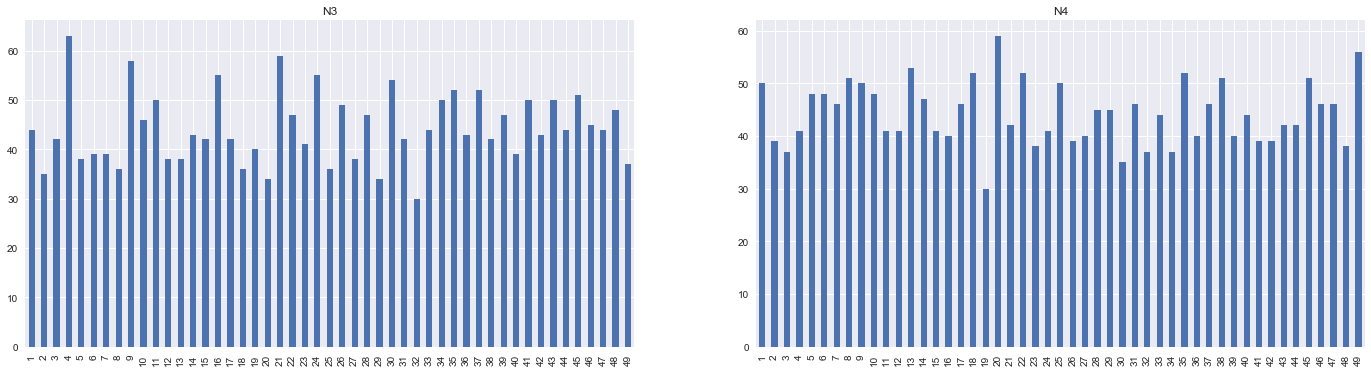

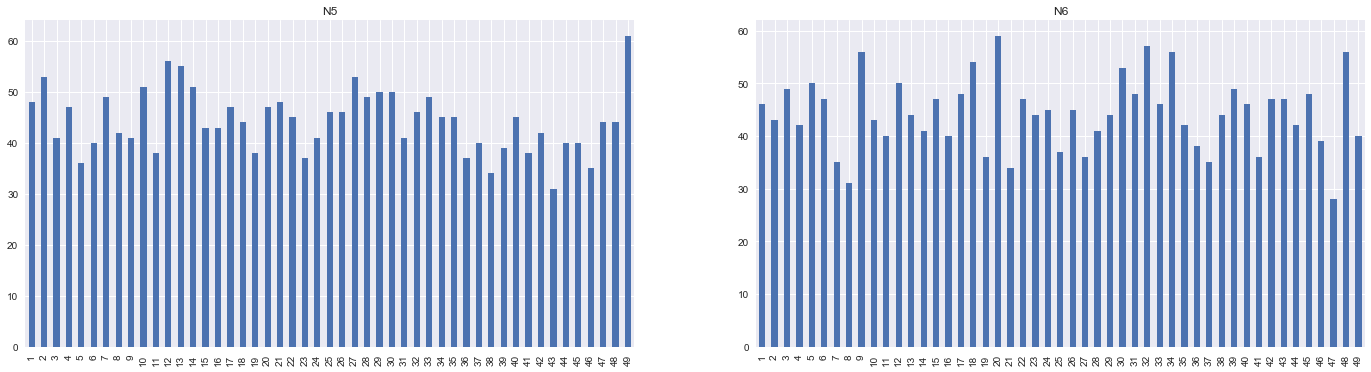

In [28]:

fig = plt.figure(figsize=(24,6))
ax1 = fig.add_subplot(121)
sample["N1"].value_counts().sort_index().plot.bar()
ax1.set_title('N1')
ax2 = fig.add_subplot(122)
sample["N2"].value_counts().sort_index().plot.bar()
ax2.set_title('N2')

fig = plt.figure(figsize=(24,6))
ax3 = fig.add_subplot(121)
sample["N3"].value_counts().sort_index().plot.bar()
ax3.set_title('N3')
ax4 = fig.add_subplot(122)
sample["N4"].value_counts().sort_index().plot.bar()
ax4.set_title('N4')

fig = plt.figure(figsize=(24,6))
ax5 = fig.add_subplot(121)
sample["N5"].value_counts().sort_index().plot.bar()
ax5.set_title('N5')
ax6 = fig.add_subplot(122)
sample["N6"].value_counts().sort_index().plot.bar()
ax6.set_title('N6')

In [202]:
# mark six logic
def check_mark_six(X, extra, ys, debug=False):
    
    d = 0
    e = 0
    for y in ys:
        if y in X:
            d += 1
        if y == extra:
            e = 1
    
    if d == 6:
        result= 1
    elif d == 5 and e==1:
        result= 2
    elif d == 5:
        result= 3
    elif d == 4 and e==1:
        result= 4
    elif d == 4:
        result= 5
    elif d == 3 and e==1:
        result= 6
    elif d == 3:
        result= 7
    else:
        result= 8
    
    if debug:
        print('debug', X, extra, ys, result)
    
    return result
    
# testing
check_mark_six([1,2,3,4,5,6], 7, [7,2,3,7,1,12,9])

6

# 1st order Markov chain

If the lottery output a number 19, we represent this state as $(19)$

Using history, we conclude the probability of the next number, say 20, by naive bayes $P(20 | 19)$

We then use Markov chain to generate sequence accordingly.

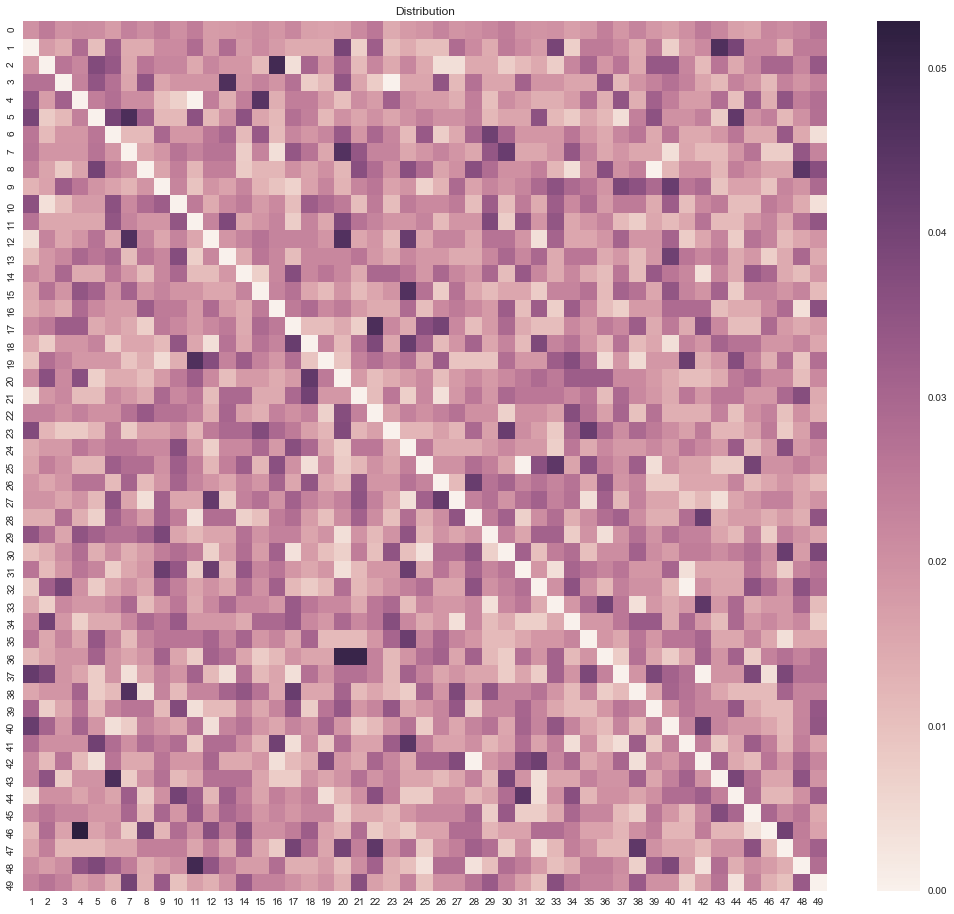

In [123]:
def naive_byes_1st_order(df):
    result = pandas.DataFrame(data=np.zeros((50, 49)), columns=range(1, 50))
    
    for index, row in df.iterrows():
        result.loc[0][row['N1']] +=1
        result.loc[row['N1']][row['N2']] +=1
        result.loc[row['N2']][row['N3']] +=1
        result.loc[row['N3']][row['N4']] +=1
        result.loc[row['N4']][row['N5']] +=1
        result.loc[row['N5']][row['N6']] +=1
        result.loc[row['N6']][row['S1']] +=1
        
    return result.div(result.sum(axis=1), axis=0)

test_dist = naive_byes_1st_order(sample)

fig = plt.figure(figsize=(18,16))
sns.heatmap(test_dist)
plt.title("Distribution")

# 2nd order Markov chain

If the lottery output was 17 and 19, we represent this state as $(17, 19)$

Using history, we conclude the probability of the next number, say 20, by naive bayes $P(20 | 17, 19)$

We then use Markov chain to generate sequence accordingly.

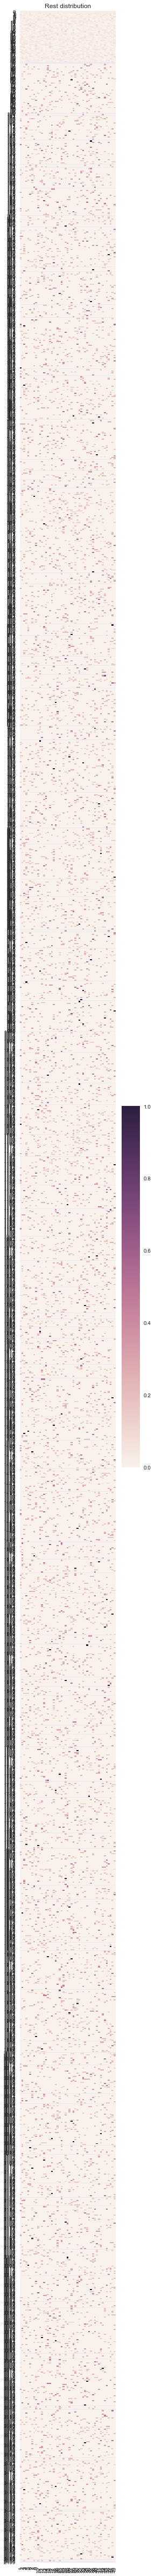

In [124]:
def naive_byes_2nd_order(df):
    # total state = 1 (init) + 49 (first N) + 50 X 49 = 50 x 50
    result = pandas.DataFrame(data=np.zeros((2500, 49)), columns=range(1, 50))
    
    for index, row in df.iterrows():
        result.loc[0][row['N1']] +=1
        result.loc[row['N1']][row['N2']] +=1
        result.loc[row['N1'] * 50 + row['N2']][row['N3']] +=1
        result.loc[row['N2'] * 50 + row['N3']][row['N4']] +=1
        result.loc[row['N3'] * 50 + row['N4']][row['N5']] +=1
        result.loc[row['N4'] * 50 + row['N5']][row['N6']] +=1
        result.loc[row['N5'] * 50 + row['N6']][row['S1']] +=1
        
    return result.div(result.sum(axis=1), axis=0)

test_dist_2 = naive_byes_2nd_order(sample)

#fig = plt.figure(figsize=(16,4))
#test_dist_2.loc[0].plot.bar()
#plt.title("First number distribution")

#fig = plt.figure(figsize=(12,10))
#sns.heatmap(test_dist_2[1:50])
#plt.title("Second number distribution")

fig = plt.figure(figsize=(4,87))
sns.heatmap(test_dist_2)
plt.title("Rest distribution")

# Conclusion

1. Sample distribution should works, because the underlying distribution is considered bias.
2. First order markov chain should works, we can spot some dark sport (high prob)
3. Second order markov chain is not going to works, no enough data to build the model, the model has 125000 params, while data can only provide 13026 sample. 10% of the total parameters. Interesting spot does exists.

In [172]:
def game_stat(result_history, bets, N):
    resample_i = np.floor(np.random.rand(N)*len(result_history)).astype(int)
    
    result = pandas.DataFrame(data=np.zeros((9, N)), index=range(0,9))
    
    for i, ri in enumerate(resample_i):
        x = game(result_history.loc[ri], bets)
        result[i] =x
    
    return result

def game(winning_bet, bets):
    result = np.zeros(9)
    for bet in bets:
        #win_num  = as.vector()
        win_num = winning_bet[['N1','N2','N3','N4','N5','N6']].values.flatten().tolist()
        rr = check_mark_six(win_num, winning_bet['S1'], bet)
        result[rr] += 1
        
    return result

In [241]:
# testing, first use uniform random as base line
def generate_random_uniform():
    return np.random.choice(range(1,50), size=7, replace=False)

bets = []
for i in range(10000):
    bets.append(generate_random_uniform())
    
win_stat_random = game_stat(sample, bets, 1)

display(win_stat_random[1:])

,0
1,0.0
2,0.0
3,0.0
4,0.0
5,24.0
6,22.0
7,295.0
8,9659.0


In [242]:
# testing, use simple sample statistic 
def generate_simple_stat():
    return np.random.choice(range(1, 50), size=7, replace=False, p=all_num_cnt_norm)

bets = []
for i in range(10000):
    bets.append(generate_simple_stat())
    
win_stat_simple = game_stat(sample, bets, 1)

display(win_stat_simple[1:])

,0
1,0.0
2,0.0
3,0.0
4,3.0
5,20.0
6,31.0
7,264.0
8,9682.0


In [243]:
def generate_1st_markov():
    gen_nums = []
    w1 = 0
    while len(gen_nums) < 7:
        t = np.random.choice(range(1, 50), p=test_dist.loc[w1])
        if t in gen_nums:
            continue
        w1 = t
        gen_nums.append(t)
    
    return gen_nums

bets = []
for i in range(10000):
    bets.append(generate_1st_markov())

win_stat_markov = game_stat(sample, bets, 1)

display(win_stat_markov[1:])

,0
1,0.0
2,0.0
3,2.0
4,0.0
5,16.0
6,35.0
7,300.0
8,9647.0


# Payoff
頭獎	選中6個「攪出號碼」	獎金會因應該期獲中頭獎注數而有所不同，每期頭獎獎金基金 訂為不少於港幣800萬元。

二獎	選中5個「攪出號碼」+「特別號碼」	獎金會因應該期獲中二獎注數而有所不同
 
三獎	選中5個「攪出號碼」	獎金會因應該期獲中三獎注數而有所不同 下限獎金19,200元

四獎	選中4個「攪出號碼」+「特別號碼」	固定獎金港幣9,600元

五獎	選中4個「攪出號碼」	固定獎金港幣640元

六獎	選中3個「攪出號碼」+「特別號碼」	固定獎金港幣320元

七獎	選中3個「攪出號碼」	固定獎金港幣40元

In [244]:
payoff = [0, 8000000, 384000, 19200, 9600, 640, 320, 40, 0]
print("Money spent: %d\n" % (10000*20))

print("Random strategy: %d" % (win_stat_random.values.T * payoff).sum())
print("Simple stat strategy: %d" % (win_stat_simple.values.T * payoff).sum())
print("Markov strategy: %d" % (win_stat_markov.values.T * payoff).sum())

Money spent: 200000

Random strategy: 34200
Simple stat strategy: 62080
Markov strategy: 71840
